# MNIST DATASET

- Name: mnist_784
- Source: Yann LeCun MNIST page
- Features: 784 numeric features (pixels) + target (digit label)
- classes: 10 (0-9)
- instances: 70,000 ( 60000 training, 10000 testing)

### Dataset description
- The MNIST Dataset is a benchmark in image classification
- Each instance is 28 x 28 grayscale image- handwritten digit, flattened into 784-D vector.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tqdm import tqdm

In [4]:
mnist=fetch_openml('mnist_784',version=1)

In [5]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
mnist.data.shape

(70000, 784)

In [9]:
mnist.target.shape

(70000,)

In [10]:
mnist.target_names

['class']

In [11]:
mnist.feature_names

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [15]:
mnist.categories

In [14]:
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [16]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [17]:
mnist.url

'https://www.openml.org/d/554'

In [20]:
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '2',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['Artificial Intelligence',
  'AzurePilot',
  'Computer Vision',
  'Data Sets',
  'Kaggle',
  'Machine Learning',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'https://data.openml.org/datasets/0000/0554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [21]:
X=mnist.data
y=mnist.target

In [22]:
X=X/255

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
model=LogisticRegression(solver='lbfgs',max_iter=500)


In [29]:
epochs=5
for i in tqdm(range(epochs)):
    model.fit(X_train,y_train)

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:03<00:00, 36.71s/it]


In [30]:
y_pred=model.predict(X_test)

In [31]:
print(accuracy_score(y_test,y_pred))

0.9202142857142858


In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.91      0.89      0.90      1380
           3       0.90      0.89      0.90      1433
           4       0.92      0.93      0.93      1295
           5       0.88      0.88      0.88      1273
           6       0.94      0.95      0.95      1396
           7       0.93      0.94      0.93      1503
           8       0.90      0.87      0.88      1357
           9       0.90      0.90      0.90      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [34]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[1298,    1,    6,    0,    3,   12,   11,    4,    6,    2],
       [   0, 1548,    6,   10,    3,   12,    0,    4,   15,    2],
       [   5,   19, 1234,   20,   15,   10,   20,   18,   29,   10],
       [   6,   10,   31, 1280,    1,   39,    7,   19,   23,   17],
       [   5,    2,    6,    5, 1202,    5,   10,    8,    8,   44],
       [   4,   11,    8,   43,   12, 1121,   21,    4,   35,   14],
       [   6,    5,   19,    1,   14,   16, 1331,    1,    3,    0],
       [   6,    4,   26,    4,   10,    7,    0, 1415,    1,   30],
       [  10,   26,   13,   46,    6,   43,   10,    9, 1176,   18],
       [   8,   11,    5,   13,   36,    7,    0,   46,   16, 1278]],
      dtype=int64)

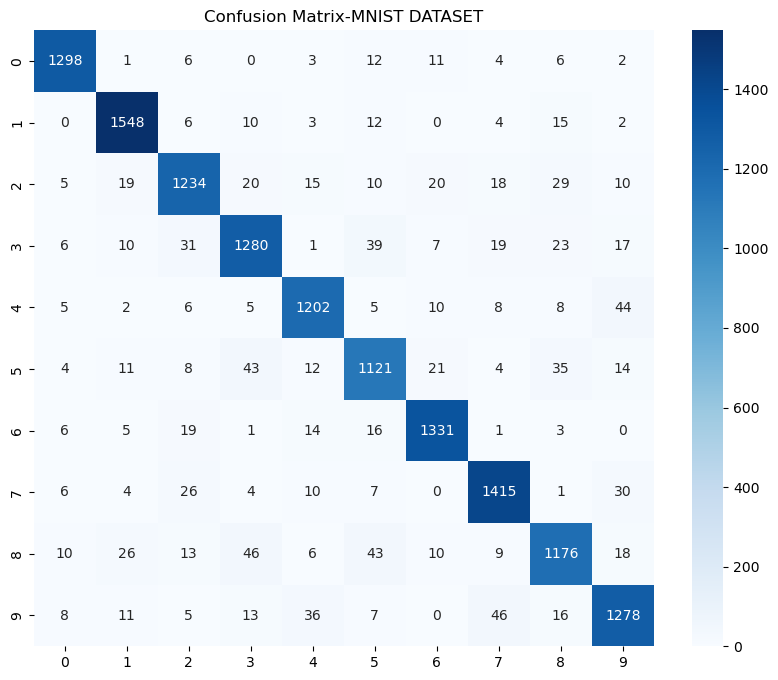

In [39]:
plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues')
plt.title("Confusion Matrix-MNIST DATASET")
plt.show()

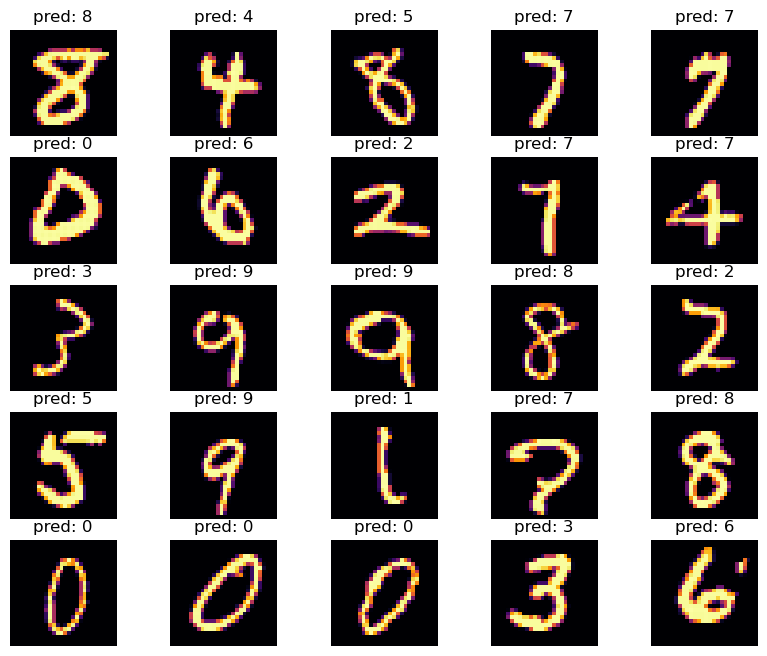

In [43]:
# display the digits 
fig, axes=plt.subplots(5,5, figsize=(10,8))
for i,ax in enumerate(axes.ravel()):
    ax.imshow(X_test.iloc[i].values.reshape(28,28),cmap='inferno')
    ax.set_title(f"pred: {y_pred[i]}")
    ax.axis("off")
plt.show()